In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torchvision
import ot
from tqdm import tqdm
import torch
import numpy as np
import random
import time
import sys
import torch.utils.data as data
sys.path.insert(0,'../training')
from manifoldembedder import MNISTDataset, MNISTPredictDataset
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 150

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 18})

In [4]:
traindataset = torchvision.datasets.MNIST('./MNIST_DATA',
                                     transform=torchvision.transforms.ToTensor(),
                                     train=True,
                                     download=True)

testdataset = torchvision.datasets.MNIST('./MNIST_DATA',
                                         transform=torchvision.transforms.ToTensor(),
                                         train=False,
                                         download=True)

In [5]:
half_train = int(len(traindataset)/2)
half_test = int(len(testdataset)/2)

In [6]:
np.random.randint(len(traindataset), size=10)

array([50784, 28112, 54290, 49133, 21826, 42592, 10902, 50839, 35263,
       54907])

In [7]:
targets = traindataset.targets

In [8]:
def get_emd_dist(dataset_len, set1, set2):
    set_ab = MNISTDataset("POT",False, None, set1, set2[np.random.permutation(dataset_len)])
    loader = DataLoader(set_ab, batch_size=2000,shuffle=False,num_workers=4)
    emd = np.array([])
    for x,y,dist in loader:
        emd = np.concatenate([emd,dist.data.numpy()])
    return emd

In [9]:
digit_list = [0,1,5,7,9]
digit_pair = []
dataset_list = []
pairname_list = []
emd_list = []
for digit in digit_list:
    data = torch.FloatTensor(traindataset.data[targets==digit]/255.)
    dataset_list.append(data)
    print(data.shape)

for i,digit1 in enumerate(digit_list):
    for j,digit2 in enumerate(digit_list):
        if digit1 <= digit2:
            digit_pair.append([digit1, digit2])
            pairname_list.append(f'Digit {digit1}-Digit {digit2}')
            emd_list.append(get_emd_dist(2000, dataset_list[i][:2000], dataset_list[j][:2000]))


torch.Size([5923, 28, 28])
torch.Size([6742, 28, 28])
torch.Size([5421, 28, 28])
torch.Size([6265, 28, 28])
torch.Size([5949, 28, 28])
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
i

In [10]:
pairname_list

['Digit 0-Digit 0',
 'Digit 0-Digit 1',
 'Digit 0-Digit 5',
 'Digit 0-Digit 7',
 'Digit 0-Digit 9',
 'Digit 1-Digit 1',
 'Digit 1-Digit 5',
 'Digit 1-Digit 7',
 'Digit 1-Digit 9',
 'Digit 5-Digit 5',
 'Digit 5-Digit 7',
 'Digit 5-Digit 9',
 'Digit 7-Digit 7',
 'Digit 7-Digit 9',
 'Digit 9-Digit 9']

In [11]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt


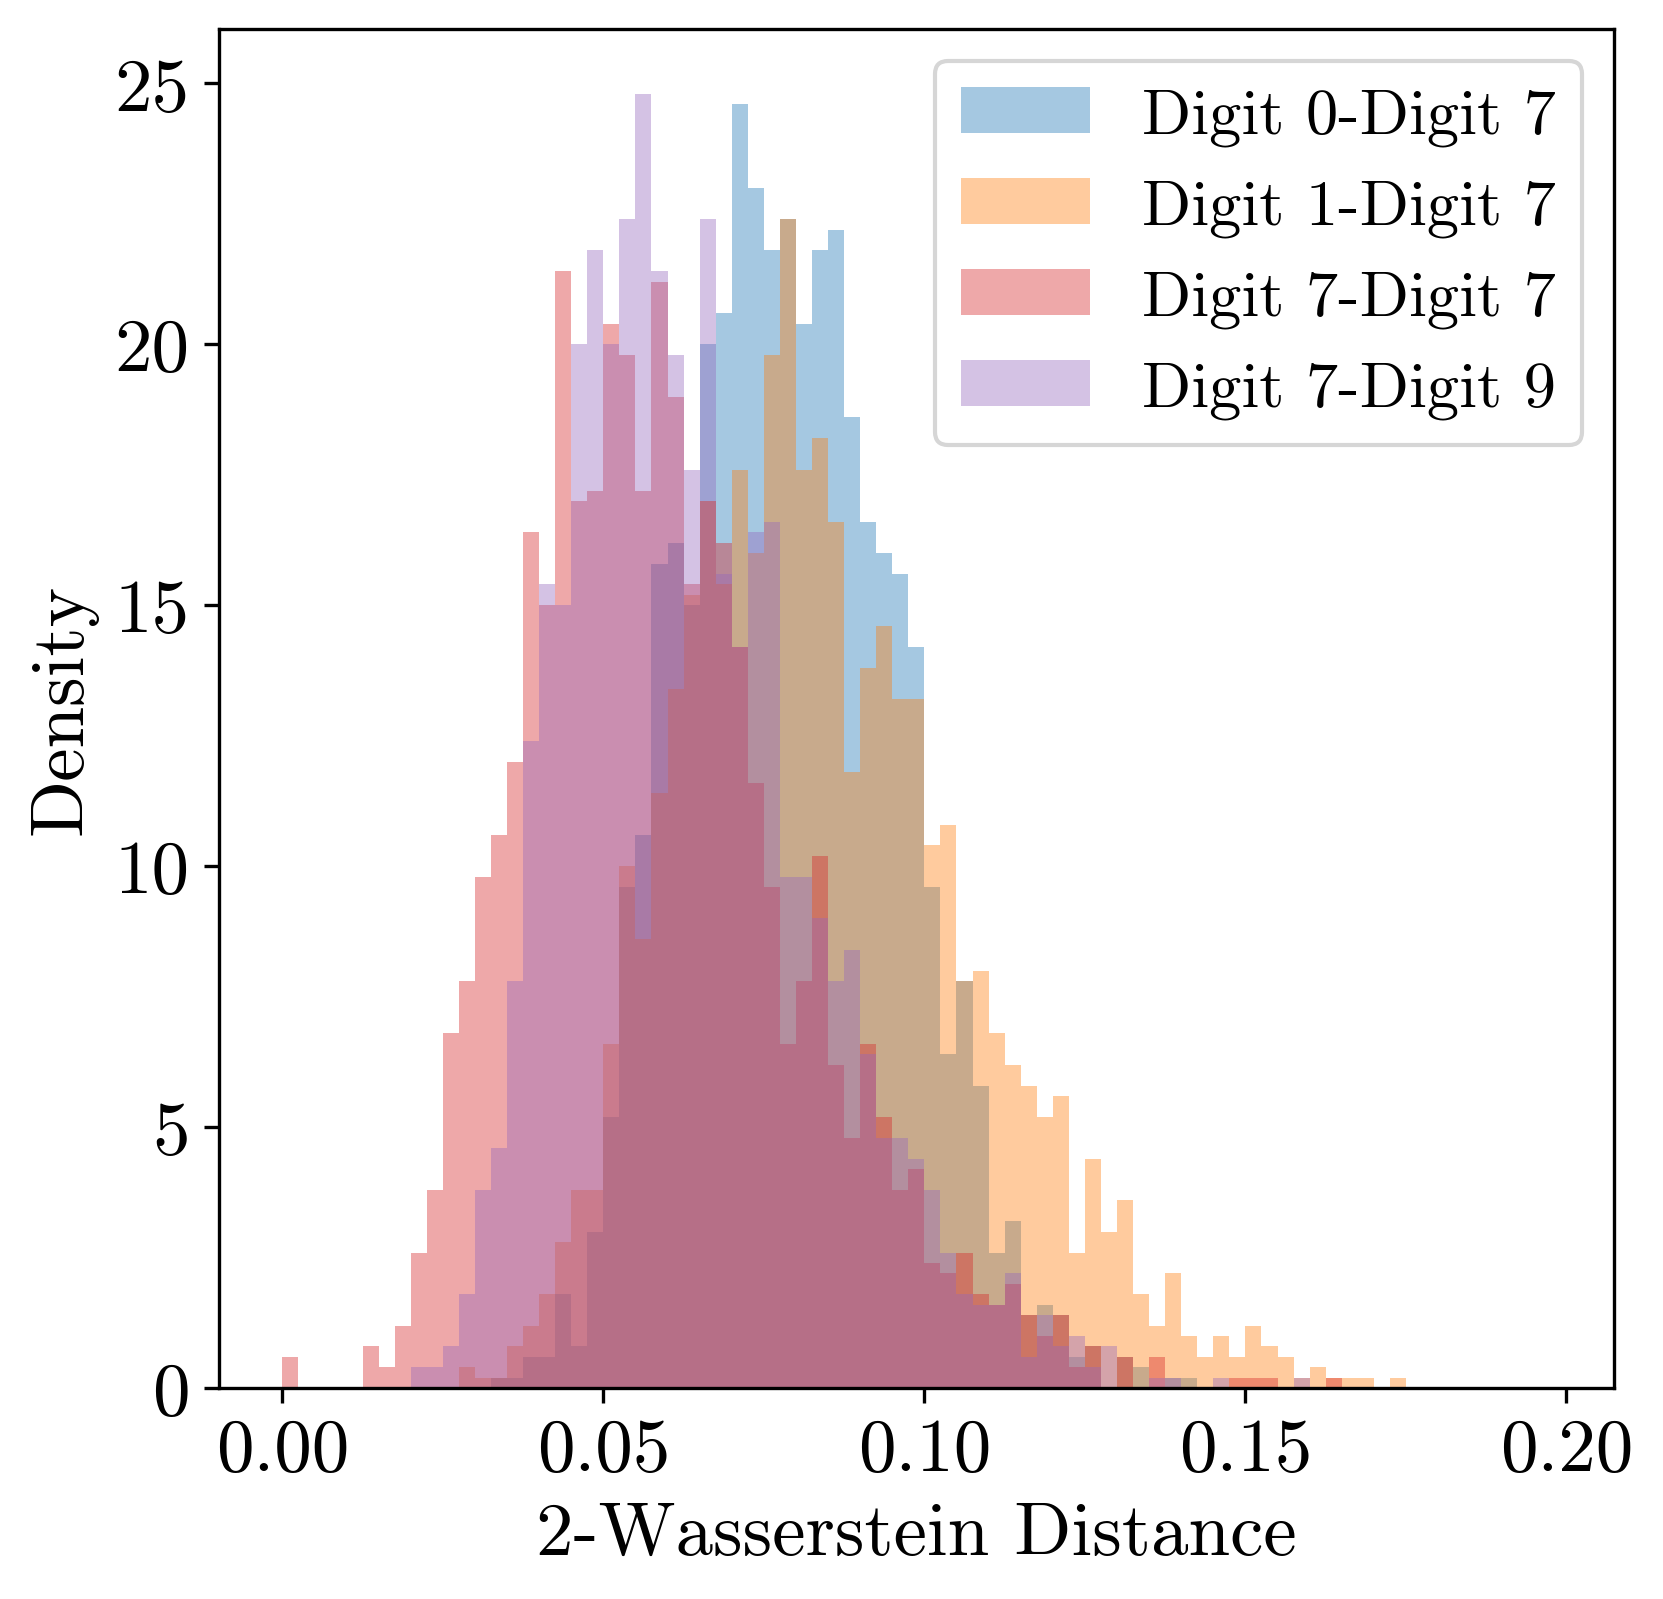

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i,index in enumerate([3,7,10,12,13]):
    if i in [2]:
        continue
    ax.hist(emd_list[index], bins=np.arange(0,.2,.0025),alpha=0.4, density=True,label=pairname_list[index], color=f'C{i}');


leg = ax.legend(fontsize=15.5)
#for lh in leg.legendHandles: 
#    lh.set_alpha(1)    
    
ax.set_xlabel("2-Wasserstein Distance")
ax.set_ylabel("Density")
figname = 'MNIST_OTDist_Digit7'
#plt.title('OTdist MNIST Digit 7')
fig.savefig(f'../figures/paper_JHEP/{figname}.png')
fig.savefig(f'../figures/paper_JHEP/{figname}.pdf')

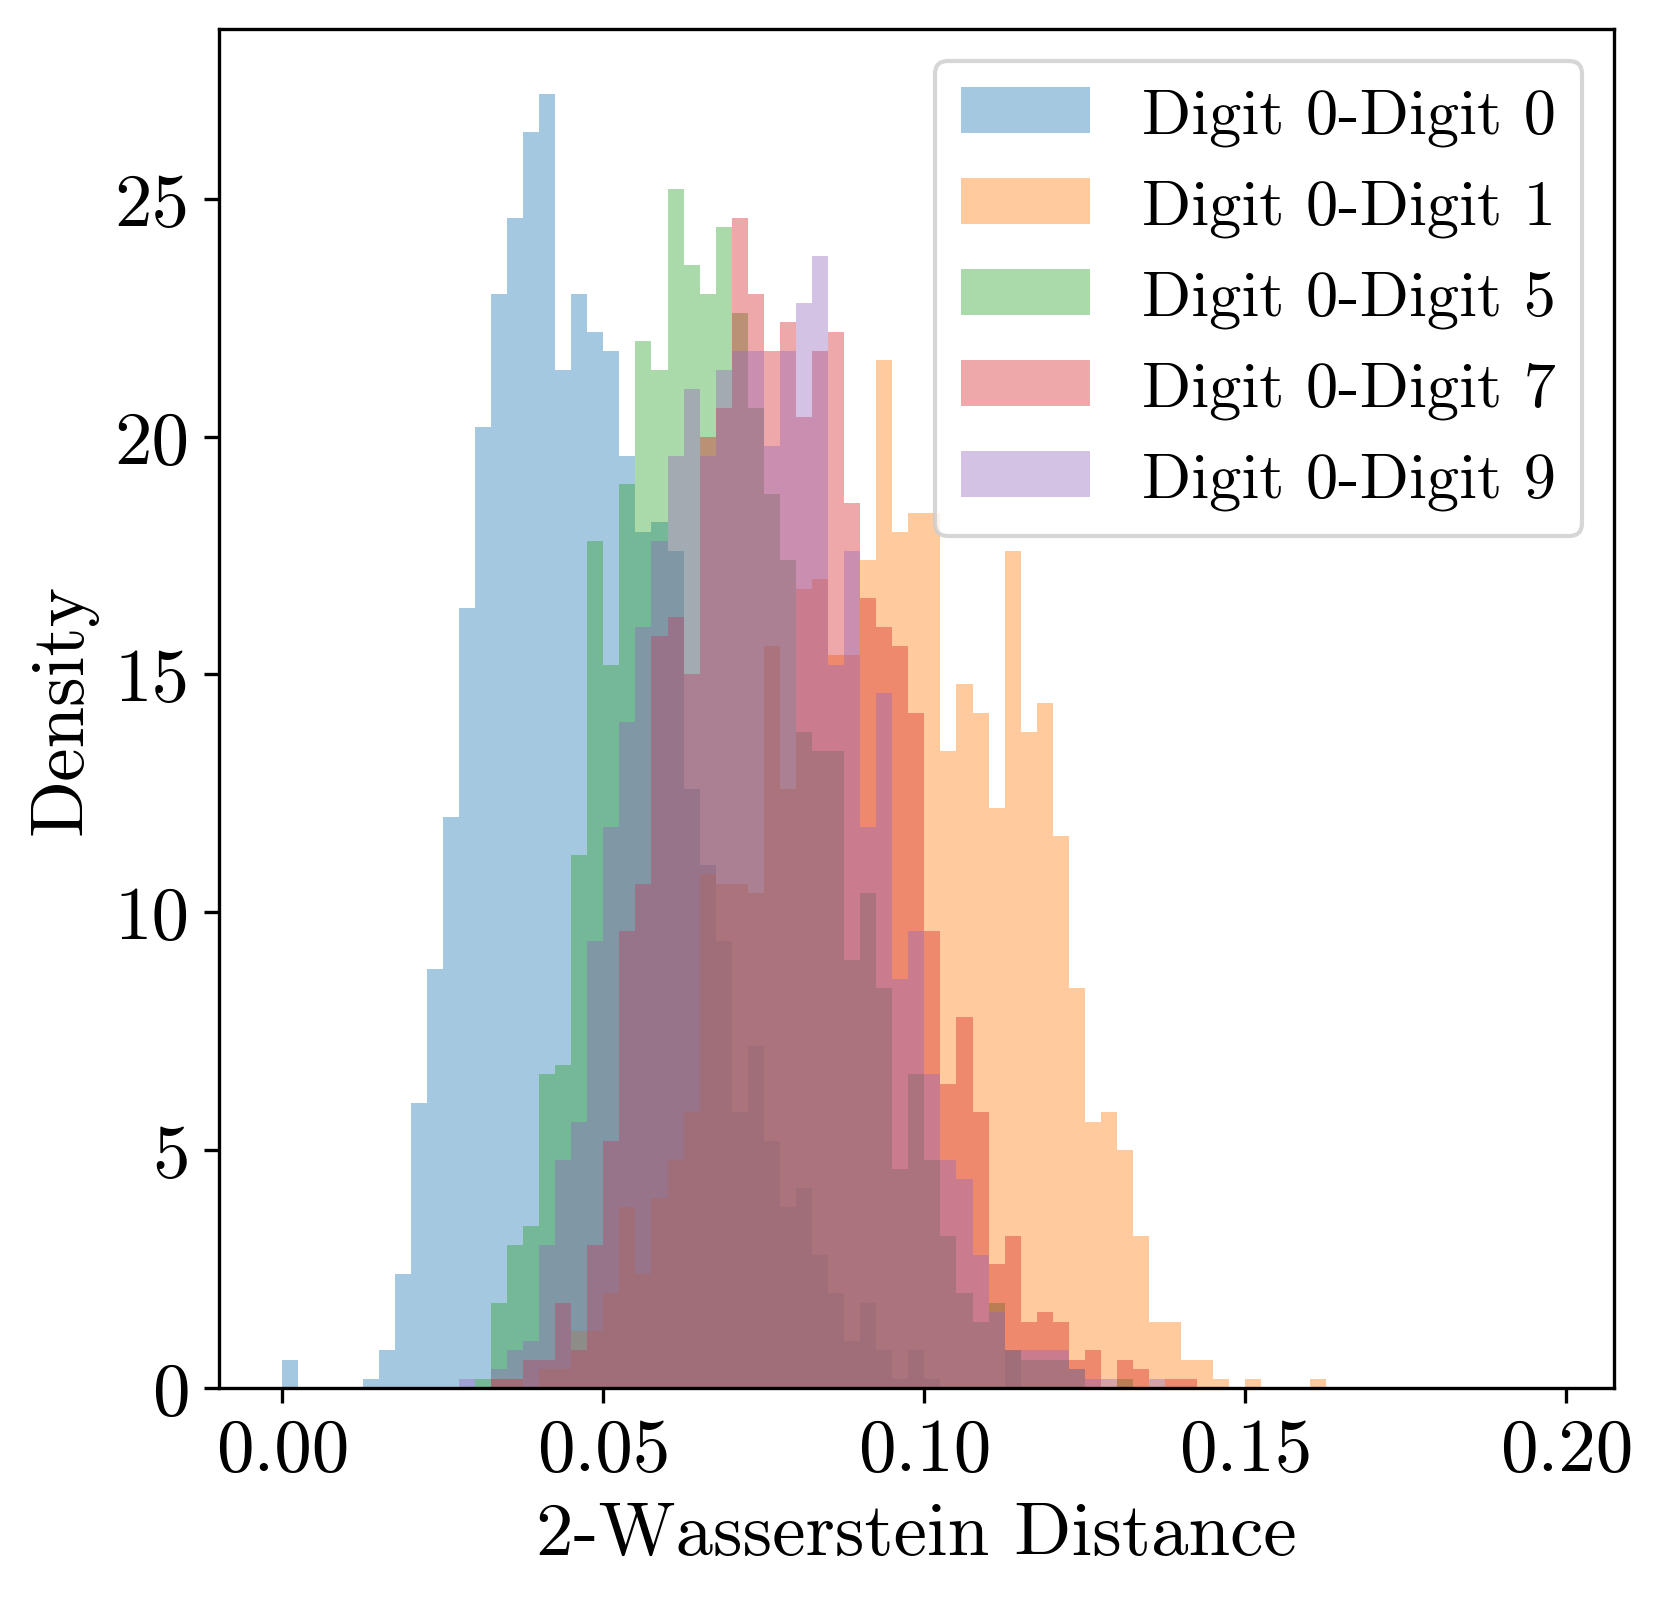

In [18]:
for i,index in enumerate([0,1,2,3,4]):
    plt.hist(emd_list[index], bins=np.arange(0,.2,.0025),alpha=0.4, density=True,label=pairname_list[index], color=f'C{i}');


plt.xlabel("2-Wasserstein Distance")
plt.ylabel("Density")
plt.legend(fontsize=15.5)

figname = 'MNIST_OTDist_Digit0'
#plt.title('OTdist MNIST Digit 7')
plt.savefig(f'../figures/paper_JHEP/{figname}.png')
plt.savefig(f'../figures/paper_JHEP/{figname}.pdf')    
    
    


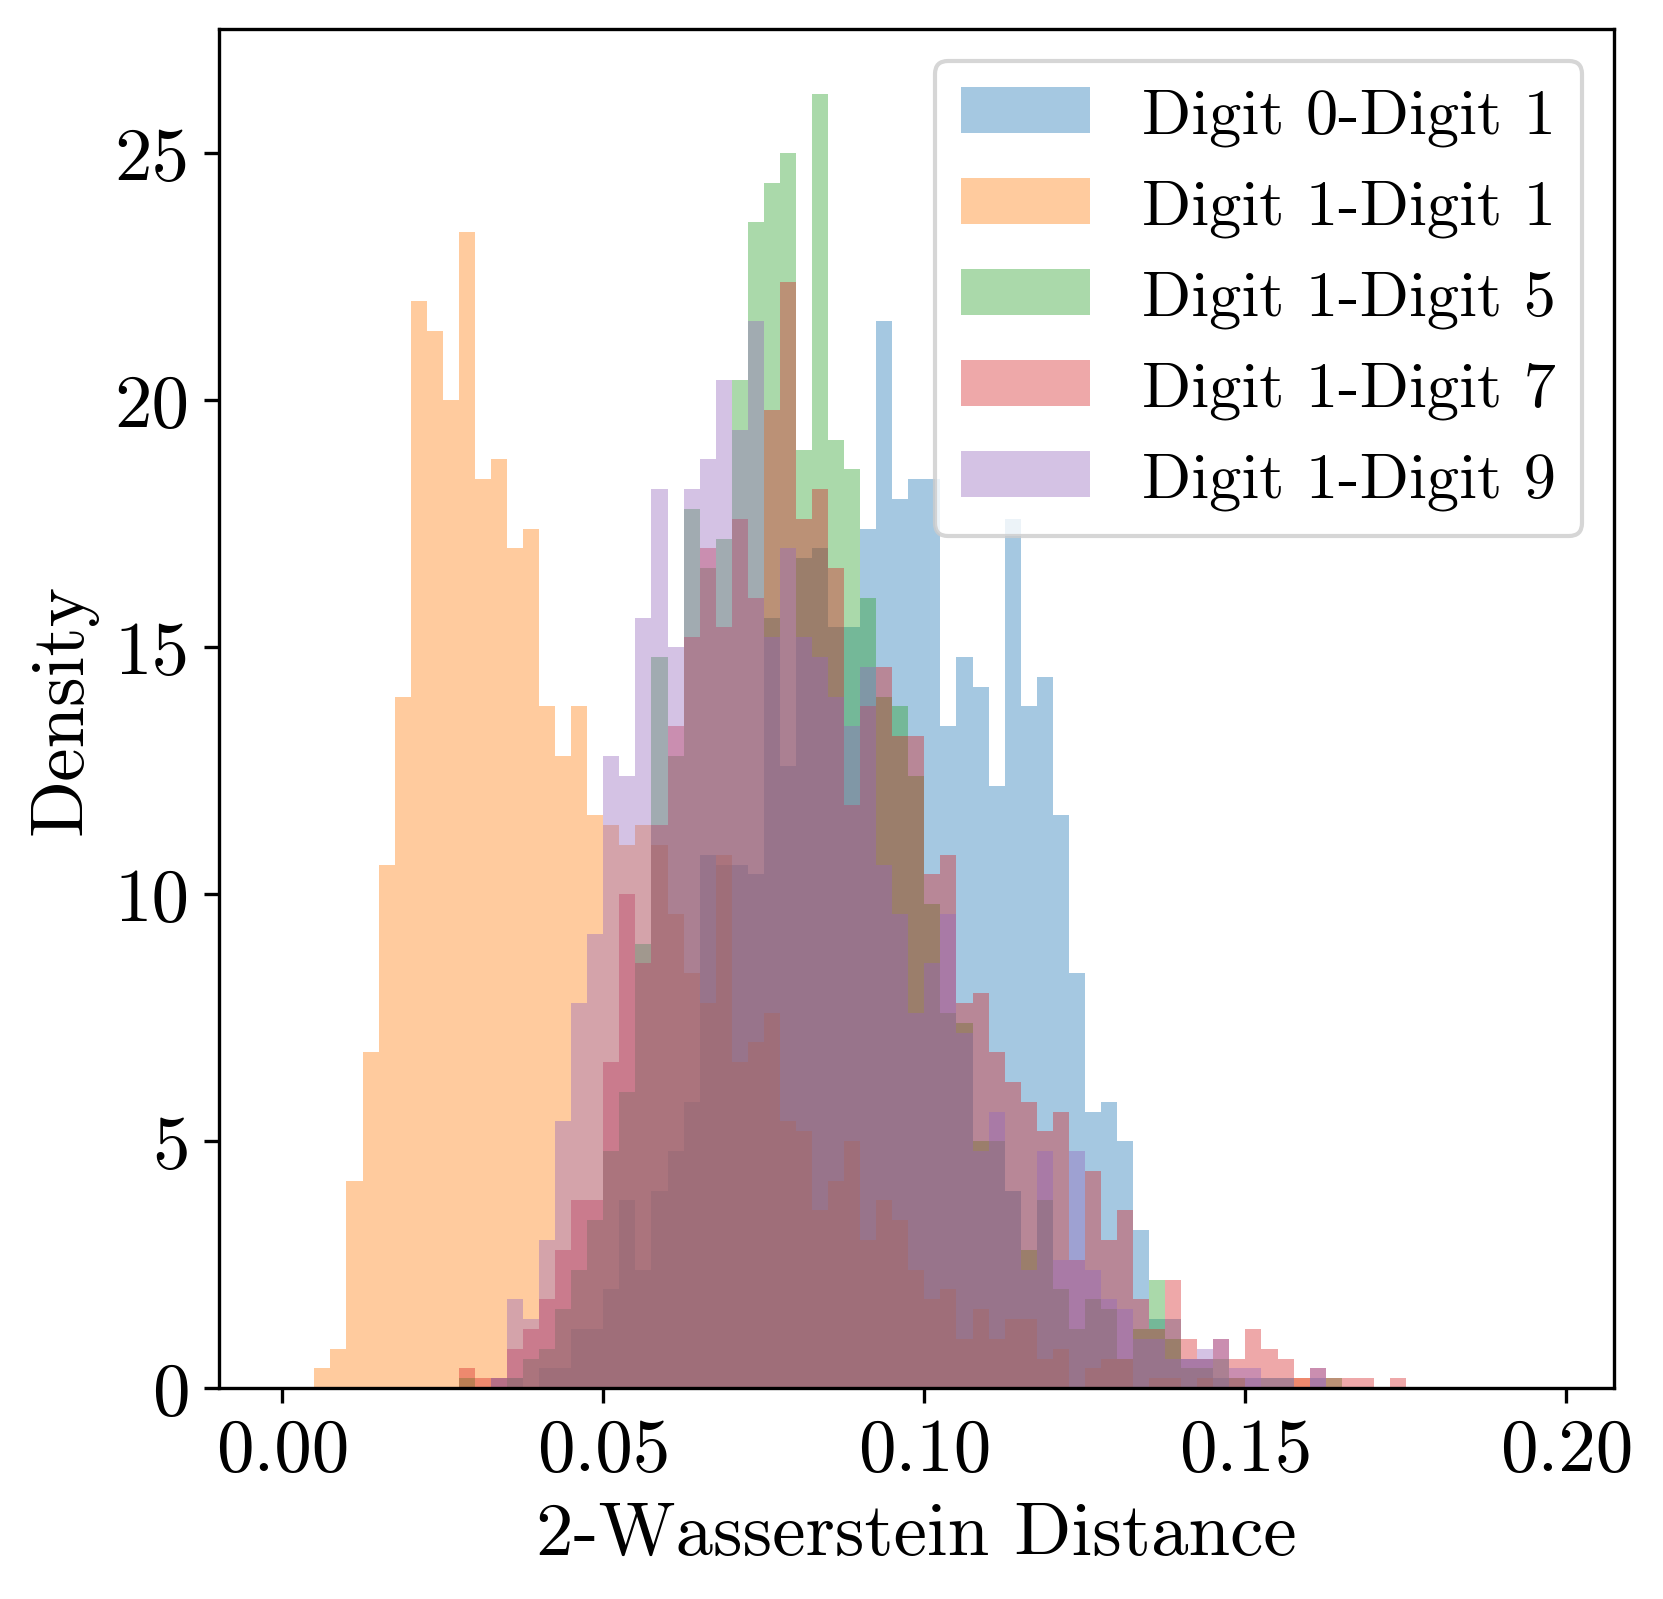

In [19]:
for i,index in enumerate([1,5,6,7,8]):
    plt.hist(emd_list[index], bins=np.arange(0,.2,.0025),alpha=0.4, density=True,label=pairname_list[index], color=f'C{i}');


plt.xlabel("2-Wasserstein Distance")
plt.ylabel("Density")
plt.legend(fontsize=15.5)

figname = 'MNIST_OTDist_Digit1'
#plt.title('OTdist MNIST Digit 7')
plt.savefig(f'../figures/paper_JHEP/{figname}.png')
plt.savefig(f'../figures/paper_JHEP/{figname}.pdf')    

In [ ]:

def get_emd_dist(digit1, digit2):
    min = a if a < b else b


In [ ]:
for i in tqdm(range(500)):
    start = time.time()
    indices = torch.randperm(len(traindataset))
    #print(indices[:5])
    #trainindices_a = torch.tensor(np.random.randint(len(traindataset), size=10000))
    #trainindices_b = torch.tensor(np.random.randint(len(traindataset), size=10000))
    trainindices_a = indices[:half_train]
    trainindices_b = indices[half_train:]
    #print(trainindices_a.shape, trainindices_b.shape)
    a = torch.FloatTensor(traindataset.data[trainindices_a]/255.)
    b = torch.FloatTensor(traindataset.data[trainindices_b]/255.)
    #print(a[0][14])
    train_set = MNISTDataset("POT",False, None, a, b)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/mnist/trainset_{i}.pt')
    
    end = time.time()
    print(end-start)


  0%|          | 0/500 [00:00<?, ?it/s]

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iteration 6600
iterati

  0%|          | 1/500 [02:42<22:29:29, 162.26s/it]

162.26288318634033
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  0%|          | 2/500 [05:33<23:09:27, 167.41s/it]

171.00434756278992
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  1%|          | 3/500 [08:14<22:43:58, 164.67s/it]

161.40412187576294
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  1%|          | 4/500 [11:05<23:00:05, 166.95s/it]

170.44251537322998
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  1%|          | 5/500 [13:45<22:38:12, 164.63s/it]

160.52479648590088
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  1%|          | 6/500 [16:26<22:24:32, 163.30s/it]

160.7271728515625
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  1%|▏         | 7/500 [19:16<22:41:18, 165.68s/it]

170.55806756019592
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 8/500 [22:07<22:52:32, 167.38s/it]

171.0382125377655
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  2%|▏         | 9/500 [24:49<22:34:34, 165.53s/it]

161.45055508613586
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 10/500 [27:40<22:45:36, 167.22s/it]

170.99358654022217
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 11/500 [30:22<22:29:27, 165.58s/it]

161.85932397842407
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 12/500 [33:12<22:37:14, 166.87s/it]

169.83781743049622
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 13/500 [36:02<22:42:00, 167.80s/it]

169.94558000564575
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 14/500 [38:44<22:25:18, 166.09s/it]

162.11956810951233
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 15/500 [41:25<22:10:28, 164.59s/it]

161.13307285308838
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 16/500 [44:07<22:01:21, 163.80s/it]

161.96987867355347
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 17/500 [46:48<21:52:54, 163.09s/it]

161.43861889839172
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  4%|▎         | 18/500 [49:30<21:46:16, 162.61s/it]

161.4720754623413
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 19/500 [52:11<21:40:50, 162.27s/it]

161.4751489162445
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 20/500 [54:53<21:37:11, 162.15s/it]

161.87247848510742
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  4%|▍         | 21/500 [57:44<21:55:42, 164.81s/it]

171.00574779510498
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  4%|▍         | 22/500 [1:00:26<21:45:00, 163.81s/it]

161.47507762908936
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  5%|▍         | 23/500 [1:03:07<21:37:37, 163.22s/it]

161.85621523857117
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  5%|▍         | 24/500 [1:05:57<21:51:00, 165.25s/it]

169.99023962020874
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  5%|▌         | 25/500 [1:08:38<21:37:07, 163.85s/it]

160.56357979774475
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  5%|▌         | 26/500 [1:11:29<21:50:35, 165.90s/it]

170.6794354915619
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  5%|▌         | 27/500 [1:14:20<22:00:05, 167.45s/it]

171.0817003250122
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▌         | 28/500 [1:17:11<22:07:23, 168.74s/it]

171.73291420936584
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  6%|▌         | 29/500 [1:20:03<22:10:09, 169.45s/it]

171.10234928131104
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  6%|▌         | 30/500 [1:22:44<21:48:19, 167.02s/it]

161.35923838615417
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  6%|▌         | 31/500 [1:25:25<21:32:08, 165.31s/it]

161.30499744415283
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  6%|▋         | 32/500 [1:28:07<21:20:35, 164.18s/it]

161.54241609573364
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 33/500 [1:30:48<21:11:22, 163.35s/it]

161.40364170074463
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 34/500 [1:33:39<21:27:09, 165.73s/it]

171.28541684150696
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 35/500 [1:36:29<21:33:14, 166.87s/it]

169.53260278701782
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 36/500 [1:39:19<21:37:35, 167.79s/it]

169.9455451965332
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  7%|▋         | 37/500 [1:42:00<21:19:55, 165.86s/it]

161.36343216896057
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  8%|▊         | 38/500 [1:44:42<21:06:50, 164.52s/it]

161.39837861061096
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  8%|▊         | 39/500 [1:47:23<20:56:39, 163.56s/it]

161.29541969299316
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  8%|▊         | 40/500 [1:50:05<20:49:49, 163.02s/it]

161.76910495758057
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  8%|▊         | 41/500 [1:52:45<20:41:48, 162.33s/it]

160.7141077518463
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  8%|▊         | 42/500 [1:55:26<20:35:10, 161.81s/it]

160.61248922348022
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  9%|▊         | 43/500 [1:58:07<20:29:47, 161.46s/it]

160.63187384605408
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  9%|▉         | 44/500 [2:00:59<20:51:09, 164.63s/it]

172.0118978023529
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  9%|▉         | 45/500 [2:03:52<21:06:59, 167.07s/it]

172.78842210769653
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  9%|▉         | 46/500 [2:06:42<21:11:02, 167.98s/it]

170.08719277381897
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  9%|▉         | 47/500 [2:09:23<20:52:54, 165.95s/it]

161.20665049552917
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 10%|▉         | 48/500 [2:12:05<20:40:57, 164.73s/it]

161.8817594051361
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

In [12]:
train1, train2 = data.random_split(traindataset, [half_train, half_train])

In [4]:
predictdata = torch.FloatTensor(testdataset.data/255.)

In [5]:
predictlabel = testdataset.targets

In [6]:
predictlabel[0]

tensor(7)

In [7]:
predictset = MNISTPredictDataset(False, None, predictdata, predictlabel)

In [8]:
torch.save(predictset, f'/nobackup/users/sangeon/datasets/mnist/predictset.pt')

In [5]:
a = torch.FloatTensor(traindataset.data[traindataset.targets==5][:1000]/255.)
b = torch.FloatTensor(traindataset.data[traindataset.targets==7][:1000]/255.)
c = torch.FloatTensor(traindataset.data[traindataset.targets==9][:1000]/255.)
d = torch.FloatTensor(traindataset.data[traindataset.targets==7][1000:2000]/255.)

In [6]:
sevenseven = MNISTDataset("POT",False, None, b, d)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


In [7]:
sevenfive = MNISTDataset("POT",False, None, b, a)

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


In [8]:
sevennine = MNISTDataset(False, None, b, c)

TypeError: __init__() missing 1 required positional argument: 'digit2_data'

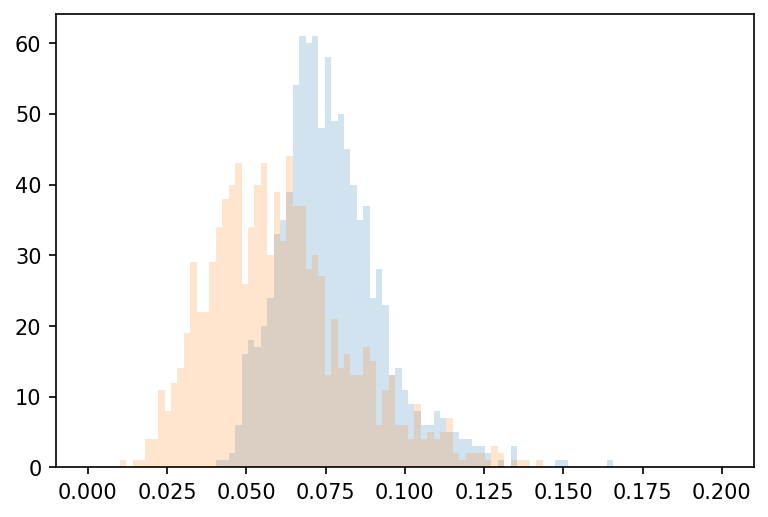

In [16]:
plt.hist(sevenfive[:][2].data.numpy(),bins=np.linspace(0,.2,100),alpha=0.2);
plt.hist(sevenseven[:][2].data.numpy(),bins=np.linspace(0,.2,100),alpha=0.2);

In [ ]:
for i in tqdm(range(100)):
    start = time.time()

    testindices_a = torch.tensor(np.random.randint(len(testdataset), size=1000))
    testindices_b = torch.tensor(np.random.randint(len(testdataset), size=1000))
    a = torch.FloatTensor(testdataset.data[testindices_a]/255.)
    b = torch.FloatTensor(testdataset.data[testindices_b]/255.)
    
    test_set = MNISTDataset("POT",False, None, a, b)
    torch.save(test_set, f'/nobackup/users/sangeon/datasets/mnist/testset_{i}.pt')
    
    end = time.time()
    print(end-start)

  0%|          | 0/100 [00:00<?, ?it/s]

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  1%|          | 1/100 [00:05<09:15,  5.61s/it]

5.613205432891846
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  2%|▏         | 2/100 [00:11<09:00,  5.51s/it]

5.43824315071106
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  3%|▎         | 3/100 [00:16<08:49,  5.46s/it]

5.399129629135132
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  4%|▍         | 4/100 [00:21<08:40,  5.42s/it]

5.365108966827393
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  5%|▌         | 5/100 [00:27<08:34,  5.42s/it]

5.405473947525024
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  6%|▌         | 6/100 [00:32<08:30,  5.43s/it]

5.455706834793091
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  7%|▋         | 7/100 [00:38<08:25,  5.43s/it]

5.441193580627441
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  8%|▊         | 8/100 [00:43<08:17,  5.41s/it]

5.361072778701782
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


  9%|▉         | 9/100 [00:48<08:11,  5.41s/it]

5.392144441604614
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 10%|█         | 10/100 [00:54<08:04,  5.39s/it]

5.344240427017212
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 11%|█         | 11/100 [00:59<07:59,  5.39s/it]

5.390184640884399
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 12%|█▏        | 12/100 [01:05<07:55,  5.40s/it]

5.417657852172852
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 13%|█▎        | 13/100 [01:10<07:49,  5.39s/it]

5.378182888031006
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 14%|█▍        | 14/100 [01:15<07:43,  5.40s/it]

5.3995208740234375
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 15%|█▌        | 15/100 [01:21<07:38,  5.39s/it]

5.370306730270386
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 16%|█▌        | 16/100 [01:26<07:33,  5.40s/it]

5.427770376205444
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 17%|█▋        | 17/100 [01:32<07:28,  5.40s/it]

5.396533489227295
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 18%|█▊        | 18/100 [01:37<07:23,  5.40s/it]

5.409095525741577
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 19%|█▉        | 19/100 [01:42<07:17,  5.41s/it]

5.408635377883911
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 20%|██        | 20/100 [01:48<07:12,  5.40s/it]

5.385838270187378
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 21%|██        | 21/100 [01:53<07:06,  5.40s/it]

5.382652759552002
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 22%|██▏       | 22/100 [01:59<07:03,  5.43s/it]

5.494643926620483
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 23%|██▎       | 23/100 [02:04<07:00,  5.46s/it]

5.526906967163086
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 24%|██▍       | 24/100 [02:10<06:53,  5.44s/it]

5.411335468292236
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 25%|██▌       | 25/100 [02:15<06:46,  5.42s/it]

5.379694700241089
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 26%|██▌       | 26/100 [02:20<06:40,  5.42s/it]

5.394429445266724
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 27%|██▋       | 27/100 [02:26<06:35,  5.42s/it]

5.434538841247559
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 28%|██▊       | 28/100 [02:31<06:30,  5.42s/it]

5.413486480712891
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 29%|██▉       | 29/100 [02:37<06:24,  5.42s/it]

5.4247026443481445
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 30%|███       | 30/100 [02:42<06:19,  5.42s/it]

5.411045551300049
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 31%|███       | 31/100 [02:47<06:13,  5.41s/it]

5.376784086227417
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 32%|███▏      | 32/100 [02:53<06:07,  5.40s/it]

5.388857364654541
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 33%|███▎      | 33/100 [02:58<06:01,  5.40s/it]

5.403162956237793
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 34%|███▍      | 34/100 [03:04<05:56,  5.40s/it]

5.407062768936157
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 35%|███▌      | 35/100 [03:09<05:51,  5.41s/it]

5.41284966468811
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 36%|███▌      | 36/100 [03:14<05:45,  5.40s/it]

5.380119562149048
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 37%|███▋      | 37/100 [03:20<05:40,  5.40s/it]

5.397467136383057
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 38%|███▊      | 38/100 [03:25<05:35,  5.42s/it]

5.455195903778076
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 39%|███▉      | 39/100 [03:31<05:29,  5.40s/it]

5.370247840881348
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 40%|████      | 40/100 [03:36<05:25,  5.42s/it]

5.474315166473389
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 41%|████      | 41/100 [03:41<05:19,  5.41s/it]

5.380326509475708
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 42%|████▏     | 42/100 [03:47<05:14,  5.42s/it]

5.423926830291748
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 43%|████▎     | 43/100 [03:52<05:08,  5.41s/it]

5.397043704986572
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 44%|████▍     | 44/100 [03:58<05:02,  5.41s/it]

5.4058990478515625
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 45%|████▌     | 45/100 [04:03<04:57,  5.41s/it]

5.402928829193115
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 46%|████▌     | 46/100 [04:08<04:51,  5.40s/it]

5.366527080535889
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 47%|████▋     | 47/100 [04:14<04:45,  5.39s/it]

5.375280141830444
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 48%|████▊     | 48/100 [04:19<04:41,  5.42s/it]

5.481957674026489
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 49%|████▉     | 49/100 [04:25<04:36,  5.41s/it]

5.399829387664795
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 50%|█████     | 50/100 [04:30<04:30,  5.41s/it]

5.392170667648315
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 51%|█████     | 51/100 [04:36<04:24,  5.41s/it]

5.402129650115967
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 52%|█████▏    | 52/100 [04:41<04:19,  5.41s/it]

5.4141316413879395
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 53%|█████▎    | 53/100 [04:46<04:13,  5.40s/it]

5.378183126449585
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 54%|█████▍    | 54/100 [04:52<04:08,  5.40s/it]

5.400301933288574
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 55%|█████▌    | 55/100 [04:57<04:02,  5.40s/it]

5.3937389850616455
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 56%|█████▌    | 56/100 [05:03<03:57,  5.40s/it]

5.400693655014038
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 57%|█████▋    | 57/100 [05:08<03:51,  5.39s/it]

5.376191139221191
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 58%|█████▊    | 58/100 [05:13<03:46,  5.40s/it]

5.399282455444336
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 59%|█████▉    | 59/100 [05:19<03:41,  5.39s/it]

5.381761789321899
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 60%|██████    | 60/100 [05:24<03:35,  5.38s/it]

5.367270231246948
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 61%|██████    | 61/100 [05:29<03:30,  5.40s/it]

5.431588649749756
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 62%|██████▏   | 62/100 [05:35<03:24,  5.39s/it]

5.3785552978515625
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 63%|██████▎   | 63/100 [05:40<03:19,  5.39s/it]

5.3941614627838135
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 64%|██████▍   | 64/100 [05:46<03:13,  5.39s/it]

5.375471830368042
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 65%|██████▌   | 65/100 [05:51<03:08,  5.39s/it]

5.39739203453064
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 66%|██████▌   | 66/100 [05:56<03:03,  5.39s/it]

5.379872798919678
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 67%|██████▋   | 67/100 [06:02<02:58,  5.41s/it]

5.454110383987427
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 68%|██████▊   | 68/100 [06:07<02:52,  5.39s/it]

5.35820746421814
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 69%|██████▉   | 69/100 [06:13<02:47,  5.42s/it]

5.472772836685181
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 70%|███████   | 70/100 [06:18<02:43,  5.44s/it]

5.47609806060791
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 71%|███████   | 71/100 [06:24<02:36,  5.41s/it]

5.353024005889893
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 72%|███████▏  | 72/100 [06:29<02:31,  5.40s/it]

5.38057279586792
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 73%|███████▎  | 73/100 [06:34<02:26,  5.41s/it]

5.4190614223480225
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 74%|███████▍  | 74/100 [06:40<02:20,  5.41s/it]

5.408719062805176
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 75%|███████▌  | 75/100 [06:45<02:15,  5.41s/it]

5.410597801208496
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 76%|███████▌  | 76/100 [06:51<02:10,  5.42s/it]

5.456738471984863
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 77%|███████▋  | 77/100 [06:56<02:04,  5.42s/it]

5.414441108703613
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 78%|███████▊  | 78/100 [07:01<01:59,  5.42s/it]

5.401003360748291
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 79%|███████▉  | 79/100 [07:07<01:53,  5.42s/it]

5.41779637336731
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 80%|████████  | 80/100 [07:12<01:48,  5.42s/it]

5.411865234375
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 81%|████████  | 81/100 [07:18<01:43,  5.43s/it]

5.465335845947266
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 82%|████████▏ | 82/100 [07:23<01:37,  5.41s/it]

5.352740287780762
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 83%|████████▎ | 83/100 [07:28<01:31,  5.40s/it]

5.397104024887085
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 84%|████████▍ | 84/100 [07:34<01:26,  5.40s/it]

5.400843620300293
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 85%|████████▌ | 85/100 [07:39<01:21,  5.42s/it]

5.442005395889282
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 86%|████████▌ | 86/100 [07:45<01:15,  5.40s/it]

5.366765260696411
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 87%|████████▋ | 87/100 [07:50<01:10,  5.40s/it]

5.40200138092041
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900


 88%|████████▊ | 88/100 [07:56<01:04,  5.41s/it]

5.4110822677612305
iteration 0
iteration 100
iteration 200
iteration 300


In [6]:
for i in tqdm(range(100)):
    start = time.time()

    valindices_a = torch.tensor(np.random.randint(len(testdataset), size=3000))
    valindices_b = torch.tensor(np.random.randint(len(testdataset), size=3000))
    a = torch.FloatTensor(testdataset.data[valindices_a]/255.)
    b = torch.FloatTensor(testdataset.data[valindices_b]/255.)
    
    val_set = MNISTDataset("POT",False, None, a, b)
    torch.save(val_set, f'/nobackup/users/sangeon/datasets/mnist/valset_{i}.pt')
    
    end = time.time()
    print(end-start)

  0%|          | 0/100 [00:00<?, ?it/s]

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  1%|          | 1/100 [00:16<26:38, 16.14s/it]

16.141958951950073
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  2%|▏         | 2/100 [00:32<26:17, 16.10s/it]

16.062495946884155
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  3%|▎         | 3/100 [00:48<26:03, 16.12s/it]

16.146956205368042
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  4%|▍         | 4/100 [01:04<25:51, 16.16s/it]

16.2160587310791
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  5%|▌         | 5/100 [01:20<25:29, 16.11s/it]

16.010514736175537
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  6%|▌         | 6/100 [01:36<25:09, 16.06s/it]

15.959627866744995
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  7%|▋         | 7/100 [01:52<24:50, 16.03s/it]

15.976370573043823
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  8%|▊         | 8/100 [02:08<24:32, 16.01s/it]

15.953756332397461
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


  9%|▉         | 9/100 [02:24<24:16, 16.01s/it]

16.008678197860718
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 10%|█         | 10/100 [02:40<24:02, 16.02s/it]

16.063775539398193
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 11%|█         | 11/100 [02:56<23:45, 16.02s/it]

15.993419647216797
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 12%|█▏        | 12/100 [03:12<23:30, 16.02s/it]

16.040417909622192
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 13%|█▎        | 13/100 [03:28<23:15, 16.04s/it]

16.084600687026978
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 14%|█▍        | 14/100 [03:44<22:57, 16.02s/it]

15.954333543777466
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 15%|█▌        | 15/100 [04:00<22:39, 15.99s/it]

15.937382698059082
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 16%|█▌        | 16/100 [04:16<22:25, 16.02s/it]

16.088369846343994
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 17%|█▋        | 17/100 [04:32<22:07, 16.00s/it]

15.938722372055054
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 18%|█▊        | 18/100 [04:48<21:51, 15.99s/it]

15.98194408416748
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 19%|█▉        | 19/100 [05:04<21:35, 15.99s/it]

15.992002010345459
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 20%|██        | 20/100 [05:20<21:18, 15.98s/it]

15.960843324661255
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 21%|██        | 21/100 [05:36<21:06, 16.03s/it]

16.1230947971344
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 22%|██▏       | 22/100 [05:52<20:50, 16.04s/it]

16.059371948242188
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 23%|██▎       | 23/100 [06:08<20:31, 16.00s/it]

15.901606559753418
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 24%|██▍       | 24/100 [06:24<20:14, 15.98s/it]

15.956782102584839
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 25%|██▌       | 25/100 [06:40<19:59, 16.00s/it]

16.023562908172607
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 26%|██▌       | 26/100 [06:56<19:45, 16.02s/it]

16.071068048477173
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 27%|██▋       | 27/100 [07:12<19:29, 16.02s/it]

16.01063370704651
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 28%|██▊       | 28/100 [07:28<19:11, 15.99s/it]

15.930568218231201
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 29%|██▉       | 29/100 [07:44<18:56, 16.00s/it]

16.028481245040894
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 30%|███       | 30/100 [08:00<18:42, 16.03s/it]

16.09011673927307
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 31%|███       | 31/100 [08:16<18:26, 16.03s/it]

16.03295111656189
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 32%|███▏      | 32/100 [08:32<18:08, 16.01s/it]

15.959375143051147
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900


 33%|███▎      | 33/100 [08:48<17:51, 15.99s/it]

15.954952955245972
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100


 33%|███▎      | 33/100 [09:00<18:16, 16.37s/it]


KeyboardInterrupt: 

In [ ]:
for i in tqdm(range(100)):
    start = time.time()

    valindices_a = torch.tensor(np.random.randint(len(testdataset), size=3000))
    valindices_b = torch.tensor(np.random.randint(len(testdataset), size=3000))
    a = torch.FloatTensor(testdataset.data[valindices_a]/255.)
    b = torch.FloatTensor(testdataset.data[valindices_b]/255.)
    
    val_set = MNISTDataset("POT",False, None, a, b)
    torch.save(val_set, f'/nobackup/users/sangeon/datasets/mnist/valset_{i}.pt')
    
    end = time.time()
    print(end-start)

In [8]:
for i in tqdm(range(100,500)):
    start = time.time()

    trainindices_a = torch.tensor(np.random.randint(len(traindataset), size=10000))
    trainindices_b = torch.tensor(np.random.randint(len(traindataset), size=10000))
    a = torch.FloatTensor(traindataset.data[trainindices_a]/255.)
    b = torch.FloatTensor(traindataset.data[trainindices_b]/255.)
    
    train_set = MNISTDataset("POT",False, None, a, b)
    torch.save(train_set, f'/nobackup/users/sangeon/datasets/mnist/trainset_{i}.pt')
    
    end = time.time()
    print(end-start)


  0%|          | 0/400 [00:00<?, ?it/s]

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iteration 6600
iterati

  0%|          | 1/400 [00:52<5:49:30, 52.56s/it]

52.55746817588806
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  0%|          | 2/400 [01:45<5:49:28, 52.68s/it]

52.77105665206909
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  1%|          | 3/400 [02:38<5:50:06, 52.91s/it]

53.18289089202881
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  1%|          | 4/400 [03:31<5:49:50, 53.01s/it]

53.150471925735474
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  1%|▏         | 5/400 [04:24<5:49:09, 53.04s/it]

53.089277029037476
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 6/400 [05:18<5:49:18, 53.19s/it]

53.50030827522278
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  2%|▏         | 7/400 [06:11<5:48:39, 53.23s/it]

53.30072093009949
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  2%|▏         | 8/400 [07:04<5:47:54, 53.25s/it]

53.292726278305054
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  2%|▏         | 9/400 [07:58<5:46:51, 53.23s/it]

53.1755952835083
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

  2%|▎         | 10/400 [08:51<5:46:10, 53.26s/it]

53.325737953186035
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 11/400 [09:44<5:45:36, 53.31s/it]

53.416255950927734
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  3%|▎         | 12/400 [10:37<5:44:19, 53.24s/it]

53.10322022438049
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  3%|▎         | 13/400 [11:31<5:43:30, 53.26s/it]

53.28256320953369
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▎         | 14/400 [12:24<5:42:35, 53.25s/it]

53.24340105056763
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 15/400 [13:17<5:41:18, 53.19s/it]

53.04319715499878
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 16/400 [14:10<5:40:50, 53.26s/it]

53.41399788856506
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 17/400 [15:04<5:39:48, 53.23s/it]

53.17299699783325
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  4%|▍         | 18/400 [15:57<5:39:38, 53.35s/it]

53.61379837989807
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  5%|▍         | 19/400 [16:51<5:39:12, 53.42s/it]

53.58177900314331
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  5%|▌         | 20/400 [17:44<5:37:40, 53.32s/it]

53.07996869087219
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  5%|▌         | 21/400 [18:37<5:36:33, 53.28s/it]

53.19782519340515
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▌         | 22/400 [19:30<5:35:28, 53.25s/it]

53.17173409461975
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▌         | 23/400 [20:23<5:34:24, 53.22s/it]

53.15377402305603
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▌         | 24/400 [21:16<5:33:15, 53.18s/it]

53.08599376678467
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▋         | 25/400 [22:10<5:32:29, 53.20s/it]

53.24388551712036
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  6%|▋         | 26/400 [23:03<5:31:21, 53.16s/it]

53.065040588378906
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 27/400 [23:56<5:30:34, 53.18s/it]

53.21482253074646
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  7%|▋         | 28/400 [24:49<5:29:35, 53.16s/it]

53.116008043289185
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  7%|▋         | 29/400 [25:42<5:28:44, 53.16s/it]

53.177197217941284
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

  8%|▊         | 30/400 [26:35<5:27:57, 53.18s/it]

53.22302460670471
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  8%|▊         | 31/400 [27:29<5:27:36, 53.27s/it]

53.46911907196045
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  8%|▊         | 32/400 [28:22<5:26:27, 53.23s/it]

53.12695240974426
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  8%|▊         | 33/400 [29:15<5:25:09, 53.16s/it]

53.00644612312317
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  8%|▊         | 34/400 [30:08<5:23:59, 53.11s/it]

53.00654339790344
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  9%|▉         | 35/400 [31:01<5:22:59, 53.10s/it]

53.05116844177246
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  9%|▉         | 36/400 [31:54<5:22:25, 53.15s/it]

53.26828646659851
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

  9%|▉         | 37/400 [32:48<5:21:34, 53.15s/it]

53.159900188446045
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 10%|▉         | 38/400 [33:41<5:20:55, 53.19s/it]

53.28171372413635
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 10%|▉         | 39/400 [34:34<5:20:03, 53.20s/it]

53.20800733566284
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 10%|█         | 40/400 [35:27<5:18:51, 53.14s/it]

53.01650333404541
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 10%|█         | 41/400 [36:20<5:17:43, 53.10s/it]

53.0031521320343
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 10%|█         | 42/400 [37:13<5:16:50, 53.10s/it]

53.105279207229614
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 11%|█         | 43/400 [38:06<5:16:14, 53.15s/it]

53.25548458099365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 11%|█         | 44/400 [39:00<5:15:55, 53.25s/it]

53.46930646896362
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 11%|█▏        | 45/400 [39:53<5:15:17, 53.29s/it]

53.393349170684814
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 12%|█▏        | 46/400 [40:47<5:14:14, 53.26s/it]

53.19371008872986
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 12%|█▏        | 47/400 [41:39<5:12:48, 53.17s/it]

52.94869303703308
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 12%|█▏        | 48/400 [42:33<5:12:26, 53.26s/it]

53.465808391571045
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 12%|█▏        | 49/400 [43:26<5:11:28, 53.24s/it]

53.210899114608765
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 12%|█▎        | 50/400 [44:19<5:10:09, 53.17s/it]

52.99467730522156
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 13%|█▎        | 51/400 [45:12<5:09:18, 53.18s/it]

53.190332889556885
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 13%|█▎        | 52/400 [46:06<5:08:55, 53.26s/it]

53.463950634002686
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 13%|█▎        | 53/400 [46:59<5:08:06, 53.28s/it]

53.30628848075867
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 14%|█▎        | 54/400 [47:52<5:07:12, 53.27s/it]

53.27039361000061
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 14%|█▍        | 55/400 [48:45<5:06:01, 53.22s/it]

53.09833216667175
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 14%|█▍        | 56/400 [49:39<5:04:50, 53.17s/it]

53.05300283432007
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 14%|█▍        | 57/400 [50:32<5:04:07, 53.20s/it]

53.26461362838745
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 14%|█▍        | 58/400 [51:25<5:03:23, 53.23s/it]

53.28677773475647
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 15%|█▍        | 59/400 [52:18<5:02:07, 53.16s/it]

53.00781035423279
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 15%|█▌        | 60/400 [53:11<5:01:16, 53.17s/it]

53.17794060707092
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 15%|█▌        | 61/400 [54:05<5:00:36, 53.20s/it]

53.29425621032715
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 16%|█▌        | 62/400 [54:58<4:59:52, 53.23s/it]

53.29846668243408
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 16%|█▌        | 63/400 [55:51<4:58:49, 53.20s/it]

53.134807109832764
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 16%|█▌        | 64/400 [56:45<4:58:32, 53.31s/it]

53.560914039611816
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 16%|█▋        | 65/400 [57:38<4:57:47, 53.33s/it]

53.38733720779419
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 16%|█▋        | 66/400 [58:32<4:57:20, 53.42s/it]

53.60375261306763
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 17%|█▋        | 67/400 [59:25<4:55:51, 53.31s/it]

53.05295991897583
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 17%|█▋        | 68/400 [1:00:18<4:54:36, 53.24s/it]

53.094746828079224
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 17%|█▋        | 69/400 [1:01:11<4:54:02, 53.30s/it]

53.43332505226135
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 18%|█▊        | 70/400 [1:02:04<4:52:50, 53.24s/it]

53.11377167701721
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 18%|█▊        | 71/400 [1:02:58<4:52:22, 53.32s/it]

53.49221920967102
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 18%|█▊        | 72/400 [1:03:51<4:51:02, 53.24s/it]

53.05176305770874
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 18%|█▊        | 73/400 [1:04:44<4:50:03, 53.22s/it]

53.179112911224365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 18%|█▊        | 74/400 [1:05:37<4:49:22, 53.26s/it]

53.34151792526245
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 19%|█▉        | 75/400 [1:06:31<4:48:54, 53.34s/it]

53.5249388217926
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 19%|█▉        | 76/400 [1:07:24<4:48:18, 53.39s/it]

53.51590538024902
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 19%|█▉        | 77/400 [1:08:18<4:47:15, 53.36s/it]

53.28839349746704
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 20%|█▉        | 78/400 [1:09:11<4:45:34, 53.21s/it]

52.8643012046814
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 20%|█▉        | 79/400 [1:10:04<4:44:39, 53.21s/it]

53.19204545021057
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 20%|██        | 80/400 [1:10:57<4:43:37, 53.18s/it]

53.121235609054565
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 20%|██        | 81/400 [1:11:50<4:42:41, 53.17s/it]

53.148622035980225
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 20%|██        | 82/400 [1:12:43<4:41:40, 53.15s/it]

53.08992624282837
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 21%|██        | 83/400 [1:13:36<4:40:50, 53.16s/it]

53.1732280254364
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 21%|██        | 84/400 [1:14:30<4:40:13, 53.21s/it]

53.32641673088074
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 21%|██▏       | 85/400 [1:15:23<4:40:03, 53.34s/it]

53.65905737876892
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 22%|██▏       | 86/400 [1:16:16<4:38:40, 53.25s/it]

53.0344352722168
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 22%|██▏       | 87/400 [1:17:09<4:37:37, 53.22s/it]

53.14138674736023
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 22%|██▏       | 88/400 [1:18:03<4:36:47, 53.23s/it]

53.252652406692505
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 22%|██▏       | 89/400 [1:18:56<4:35:48, 53.21s/it]

53.16663861274719
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 22%|██▎       | 90/400 [1:19:49<4:34:29, 53.13s/it]

52.93598198890686
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 23%|██▎       | 91/400 [1:20:42<4:33:09, 53.04s/it]

52.837916135787964
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 23%|██▎       | 92/400 [1:21:35<4:33:24, 53.26s/it]

53.7699191570282
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 23%|██▎       | 93/400 [1:22:29<4:32:32, 53.26s/it]

53.27425670623779
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 24%|██▎       | 94/400 [1:23:22<4:31:26, 53.22s/it]

53.12599229812622
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 24%|██▍       | 95/400 [1:24:15<4:30:19, 53.18s/it]

53.075833797454834
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 24%|██▍       | 96/400 [1:25:08<4:29:24, 53.17s/it]

53.16118788719177
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 24%|██▍       | 97/400 [1:26:01<4:28:33, 53.18s/it]

53.195714473724365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 24%|██▍       | 98/400 [1:26:54<4:27:47, 53.20s/it]

53.25835299491882
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 25%|██▍       | 99/400 [1:27:48<4:27:20, 53.29s/it]

53.48728942871094
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 25%|██▌       | 100/400 [1:28:41<4:26:16, 53.25s/it]

53.16856837272644
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 25%|██▌       | 101/400 [1:29:34<4:25:08, 53.21s/it]

53.09111738204956
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 26%|██▌       | 102/400 [1:30:28<4:24:35, 53.27s/it]

53.43608856201172
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 26%|██▌       | 103/400 [1:31:21<4:23:42, 53.27s/it]

53.27448797225952
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 26%|██▌       | 104/400 [1:32:14<4:22:44, 53.26s/it]

53.214874029159546
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 26%|██▋       | 105/400 [1:33:07<4:21:32, 53.20s/it]

53.05311417579651
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 26%|██▋       | 106/400 [1:34:00<4:20:25, 53.15s/it]

53.03167772293091
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 27%|██▋       | 107/400 [1:34:54<4:20:09, 53.28s/it]

53.574172496795654
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 27%|██▋       | 108/400 [1:35:47<4:19:11, 53.26s/it]

53.21760058403015
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 27%|██▋       | 109/400 [1:36:40<4:18:20, 53.27s/it]

53.28764486312866
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 28%|██▊       | 110/400 [1:37:34<4:17:51, 53.35s/it]

53.536285161972046
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 28%|██▊       | 111/400 [1:38:27<4:16:44, 53.30s/it]

53.200759410858154
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 28%|██▊       | 112/400 [1:39:20<4:15:19, 53.19s/it]

52.92716717720032
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 28%|██▊       | 113/400 [1:40:13<4:14:24, 53.19s/it]

53.1701295375824
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 28%|██▊       | 114/400 [1:41:06<4:13:18, 53.14s/it]

53.04003572463989
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 29%|██▉       | 115/400 [1:41:59<4:12:21, 53.13s/it]

53.089808225631714
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 29%|██▉       | 116/400 [1:42:53<4:11:38, 53.16s/it]

53.244128942489624
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 29%|██▉       | 117/400 [1:43:46<4:10:47, 53.17s/it]

53.187169551849365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 30%|██▉       | 118/400 [1:44:39<4:10:22, 53.27s/it]

53.5076060295105
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 30%|██▉       | 119/400 [1:45:32<4:09:14, 53.22s/it]

53.091447591781616
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 30%|███       | 120/400 [1:46:26<4:08:20, 53.21s/it]

53.20768141746521
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 30%|███       | 121/400 [1:47:19<4:07:39, 53.26s/it]

53.36754298210144
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 30%|███       | 122/400 [1:48:12<4:06:44, 53.25s/it]

53.23113942146301
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 31%|███       | 123/400 [1:49:05<4:05:44, 53.23s/it]

53.17757177352905
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 31%|███       | 124/400 [1:49:59<4:04:50, 53.22s/it]

53.21113324165344
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 31%|███▏      | 125/400 [1:50:52<4:04:02, 53.25s/it]

53.29479455947876
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 32%|███▏      | 126/400 [1:51:45<4:02:53, 53.19s/it]

53.057069301605225
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 32%|███▏      | 127/400 [1:52:38<4:02:04, 53.20s/it]

53.2372932434082
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 32%|███▏      | 128/400 [1:53:31<4:01:22, 53.24s/it]

53.336623430252075
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 32%|███▏      | 129/400 [1:54:25<4:00:15, 53.19s/it]

53.0693359375
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iteratio

 32%|███▎      | 130/400 [1:55:18<3:59:33, 53.24s/it]

53.33573532104492
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 33%|███▎      | 131/400 [1:56:11<3:58:41, 53.24s/it]

53.25185561180115
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 33%|███▎      | 132/400 [1:57:05<3:58:18, 53.35s/it]

53.61312747001648
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 33%|███▎      | 133/400 [1:57:58<3:57:11, 53.30s/it]

53.179890871047974
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 34%|███▎      | 134/400 [1:58:51<3:56:05, 53.26s/it]

53.146828174591064
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 34%|███▍      | 135/400 [1:59:44<3:55:11, 53.25s/it]

53.23607349395752
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 34%|███▍      | 136/400 [2:00:38<3:54:24, 53.28s/it]

53.33749485015869
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 34%|███▍      | 137/400 [2:01:31<3:53:27, 53.26s/it]

53.219112157821655
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 34%|███▍      | 138/400 [2:02:24<3:52:14, 53.18s/it]

53.0050847530365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 35%|███▍      | 139/400 [2:03:17<3:51:20, 53.18s/it]

53.17451238632202
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 35%|███▌      | 140/400 [2:04:10<3:50:27, 53.18s/it]

53.181119441986084
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 35%|███▌      | 141/400 [2:05:03<3:49:29, 53.16s/it]

53.12203335762024
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 36%|███▌      | 142/400 [2:05:57<3:48:51, 53.22s/it]

53.35931086540222
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 36%|███▌      | 143/400 [2:06:50<3:47:50, 53.19s/it]

53.122243881225586
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 36%|███▌      | 144/400 [2:07:43<3:46:49, 53.16s/it]

53.08340263366699
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 36%|███▋      | 145/400 [2:08:36<3:46:18, 53.25s/it]

53.45078921318054
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 36%|███▋      | 146/400 [2:09:30<3:45:19, 53.23s/it]

53.178117752075195
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 37%|███▋      | 147/400 [2:10:23<3:44:12, 53.17s/it]

53.03651714324951
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 37%|███▋      | 148/400 [2:11:16<3:43:21, 53.18s/it]

53.20087933540344
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 37%|███▋      | 149/400 [2:12:09<3:42:32, 53.20s/it]

53.231717109680176
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 38%|███▊      | 150/400 [2:13:02<3:41:40, 53.20s/it]

53.22172737121582
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 38%|███▊      | 151/400 [2:13:55<3:40:42, 53.18s/it]

53.12807035446167
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 38%|███▊      | 152/400 [2:14:49<3:40:07, 53.26s/it]

53.435508489608765
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 38%|███▊      | 153/400 [2:15:42<3:39:22, 53.29s/it]

53.36553192138672
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 38%|███▊      | 154/400 [2:16:35<3:38:19, 53.25s/it]

53.14976716041565
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 39%|███▉      | 155/400 [2:17:29<3:37:40, 53.31s/it]

53.44074296951294
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 39%|███▉      | 156/400 [2:18:22<3:36:57, 53.35s/it]

53.45578646659851
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 39%|███▉      | 157/400 [2:19:16<3:36:19, 53.41s/it]

53.554709911346436
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 40%|███▉      | 158/400 [2:20:09<3:35:20, 53.39s/it]

53.3336763381958
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 40%|███▉      | 159/400 [2:21:02<3:34:07, 53.31s/it]

53.12441611289978
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 40%|████      | 160/400 [2:21:55<3:32:59, 53.25s/it]

53.09540772438049
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 40%|████      | 161/400 [2:22:48<3:31:59, 53.22s/it]

53.160895347595215
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 40%|████      | 162/400 [2:23:42<3:31:17, 53.27s/it]

53.37612318992615
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 41%|████      | 163/400 [2:24:35<3:30:20, 53.25s/it]

53.217995166778564
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 41%|████      | 164/400 [2:25:28<3:29:27, 53.25s/it]

53.2491979598999
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 41%|████▏     | 165/400 [2:26:22<3:28:52, 53.33s/it]

53.507662296295166
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 42%|████▏     | 166/400 [2:27:15<3:27:56, 53.32s/it]

53.29230833053589
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 42%|████▏     | 167/400 [2:28:09<3:27:13, 53.36s/it]

53.46832990646362
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 42%|████▏     | 168/400 [2:29:02<3:25:50, 53.24s/it]

52.93966841697693
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 42%|████▏     | 169/400 [2:29:55<3:24:46, 53.19s/it]

53.08095717430115
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 42%|████▎     | 170/400 [2:30:48<3:23:45, 53.16s/it]

53.07421875
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iteration 

 43%|████▎     | 171/400 [2:31:41<3:22:52, 53.16s/it]

53.15988850593567
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 43%|████▎     | 172/400 [2:32:35<3:22:37, 53.32s/it]

53.705044746398926
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 43%|████▎     | 173/400 [2:33:28<3:21:36, 53.29s/it]

53.20308446884155
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 44%|████▎     | 174/400 [2:34:21<3:20:45, 53.30s/it]

53.31954860687256
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 44%|████▍     | 175/400 [2:35:14<3:19:43, 53.26s/it]

53.17513942718506
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 44%|████▍     | 176/400 [2:36:07<3:18:44, 53.23s/it]

53.17285919189453
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 44%|████▍     | 177/400 [2:37:01<3:17:49, 53.22s/it]

53.20081067085266
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 44%|████▍     | 178/400 [2:37:54<3:16:41, 53.16s/it]

53.011995792388916
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 45%|████▍     | 179/400 [2:38:47<3:15:50, 53.17s/it]

53.19416332244873
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 45%|████▌     | 180/400 [2:39:40<3:14:51, 53.14s/it]

53.07109332084656
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 45%|████▌     | 181/400 [2:40:33<3:13:56, 53.14s/it]

53.12289643287659
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 46%|████▌     | 182/400 [2:41:26<3:12:50, 53.07s/it]

52.92907786369324
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 46%|████▌     | 183/400 [2:42:19<3:12:01, 53.10s/it]

53.142427921295166
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 46%|████▌     | 184/400 [2:43:12<3:11:14, 53.12s/it]

53.193426847457886
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 46%|████▋     | 185/400 [2:44:06<3:10:27, 53.15s/it]

53.21225929260254
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 46%|████▋     | 186/400 [2:44:59<3:09:32, 53.14s/it]

53.11704730987549
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 47%|████▋     | 187/400 [2:45:52<3:08:42, 53.16s/it]

53.200215101242065
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 47%|████▋     | 188/400 [2:46:45<3:07:53, 53.17s/it]

53.21020317077637
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 47%|████▋     | 189/400 [2:47:38<3:06:59, 53.17s/it]

53.16621208190918
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 48%|████▊     | 190/400 [2:48:32<3:06:21, 53.25s/it]

53.42088603973389
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 48%|████▊     | 191/400 [2:49:25<3:05:46, 53.33s/it]

53.53159713745117
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 48%|████▊     | 192/400 [2:50:18<3:04:47, 53.31s/it]

53.24147987365723
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 48%|████▊     | 193/400 [2:51:12<3:03:43, 53.25s/it]

53.12771916389465
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 48%|████▊     | 194/400 [2:52:05<3:02:50, 53.25s/it]

53.25703430175781
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 49%|████▉     | 195/400 [2:52:58<3:01:48, 53.21s/it]

53.11539840698242
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 49%|████▉     | 196/400 [2:53:51<3:00:55, 53.21s/it]

53.21158814430237
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 49%|████▉     | 197/400 [2:54:44<2:59:54, 53.17s/it]

53.07790279388428
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 50%|████▉     | 198/400 [2:55:38<2:59:15, 53.25s/it]

53.4202938079834
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 50%|████▉     | 199/400 [2:56:31<2:58:23, 53.25s/it]

53.26446557044983
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 50%|█████     | 200/400 [2:57:24<2:57:48, 53.34s/it]

53.55692672729492
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 50%|█████     | 201/400 [2:58:18<2:56:42, 53.28s/it]

53.12620401382446
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 50%|█████     | 202/400 [2:59:11<2:55:35, 53.21s/it]

53.051185607910156
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 51%|█████     | 203/400 [3:00:04<2:54:56, 53.28s/it]

53.45279669761658
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 51%|█████     | 204/400 [3:00:57<2:53:50, 53.22s/it]

53.05743336677551
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 51%|█████▏    | 205/400 [3:01:50<2:52:59, 53.23s/it]

53.2502224445343
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 52%|█████▏    | 206/400 [3:02:43<2:51:50, 53.15s/it]

52.966230392456055
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 52%|█████▏    | 207/400 [3:03:37<2:51:16, 53.25s/it]

53.468977212905884
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 52%|█████▏    | 208/400 [3:04:30<2:50:31, 53.29s/it]

53.39009428024292
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 52%|█████▏    | 209/400 [3:05:23<2:49:35, 53.27s/it]

53.23467707633972
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 52%|█████▎    | 210/400 [3:06:16<2:48:21, 53.17s/it]

52.916513204574585
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 53%|█████▎    | 211/400 [3:07:09<2:47:24, 53.15s/it]

53.09905195236206
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 53%|█████▎    | 212/400 [3:08:03<2:46:34, 53.16s/it]

53.19299602508545
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 53%|█████▎    | 213/400 [3:08:56<2:45:59, 53.26s/it]

53.482149839401245
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 54%|█████▎    | 214/400 [3:09:49<2:45:05, 53.26s/it]

53.255637884140015
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 54%|█████▍    | 215/400 [3:10:43<2:44:07, 53.23s/it]

53.17390704154968
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 54%|█████▍    | 216/400 [3:11:36<2:43:33, 53.33s/it]

53.566139936447144
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 54%|█████▍    | 217/400 [3:12:29<2:42:40, 53.34s/it]

53.34204888343811
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 55%|█████▍    | 218/400 [3:13:23<2:41:33, 53.26s/it]

53.09228563308716
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 55%|█████▍    | 219/400 [3:14:16<2:40:32, 53.22s/it]

53.10877084732056
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 55%|█████▌    | 220/400 [3:15:09<2:39:31, 53.18s/it]

53.08043050765991
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 55%|█████▌    | 221/400 [3:16:02<2:38:30, 53.13s/it]

53.02338457107544
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 56%|█████▌    | 222/400 [3:16:55<2:37:43, 53.16s/it]

53.24130725860596
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 56%|█████▌    | 223/400 [3:17:48<2:36:52, 53.18s/it]

53.21703290939331
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 56%|█████▌    | 224/400 [3:18:42<2:36:14, 53.26s/it]

53.46150827407837
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 56%|█████▋    | 225/400 [3:19:35<2:35:10, 53.20s/it]

53.062395334243774
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 56%|█████▋    | 226/400 [3:20:28<2:34:07, 53.15s/it]

53.01751208305359
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 57%|█████▋    | 227/400 [3:21:21<2:33:05, 53.09s/it]

52.963639974594116
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 57%|█████▋    | 228/400 [3:22:14<2:32:29, 53.20s/it]

53.43237519264221
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 57%|█████▋    | 229/400 [3:23:08<2:31:55, 53.31s/it]

53.57628011703491
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 57%|█████▊    | 230/400 [3:24:01<2:31:11, 53.36s/it]

53.474520683288574
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 58%|█████▊    | 231/400 [3:24:54<2:30:04, 53.28s/it]

53.09722185134888
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 58%|█████▊    | 232/400 [3:25:48<2:29:22, 53.35s/it]

53.508629322052
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iterat

 58%|█████▊    | 233/400 [3:26:41<2:28:38, 53.40s/it]

53.52333450317383
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 58%|█████▊    | 234/400 [3:27:35<2:27:36, 53.36s/it]

53.24544954299927
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 59%|█████▉    | 235/400 [3:28:28<2:26:41, 53.34s/it]

53.31540894508362
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 59%|█████▉    | 236/400 [3:29:22<2:26:04, 53.44s/it]

53.67872905731201
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 59%|█████▉    | 237/400 [3:30:15<2:24:56, 53.35s/it]

53.137141942977905
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 60%|█████▉    | 238/400 [3:31:08<2:23:55, 53.31s/it]

53.20376443862915
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 60%|█████▉    | 239/400 [3:32:02<2:23:25, 53.45s/it]

53.77270030975342
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 60%|██████    | 240/400 [3:32:55<2:22:12, 53.33s/it]

53.05603003501892
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 60%|██████    | 241/400 [3:33:48<2:21:05, 53.24s/it]

53.039273500442505
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 60%|██████    | 242/400 [3:34:41<2:20:19, 53.29s/it]

53.39828968048096
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 61%|██████    | 243/400 [3:35:34<2:19:23, 53.27s/it]

53.21641755104065
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 61%|██████    | 244/400 [3:36:28<2:18:23, 53.23s/it]

53.14085865020752
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 61%|██████▏   | 245/400 [3:37:21<2:17:27, 53.21s/it]

53.159191608428955
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 62%|██████▏   | 246/400 [3:38:14<2:16:40, 53.25s/it]

53.34750771522522
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 62%|██████▏   | 247/400 [3:39:07<2:15:36, 53.18s/it]

53.01804709434509
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 62%|██████▏   | 248/400 [3:40:00<2:14:42, 53.18s/it]

53.16393566131592
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 62%|██████▏   | 249/400 [3:40:54<2:14:09, 53.31s/it]

53.61613178253174
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 62%|██████▎   | 250/400 [3:41:47<2:13:09, 53.27s/it]

53.166234731674194
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 63%|██████▎   | 251/400 [3:42:40<2:12:06, 53.20s/it]

53.04162406921387
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 63%|██████▎   | 252/400 [3:43:33<2:11:17, 53.23s/it]

53.29086709022522
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 63%|██████▎   | 253/400 [3:44:27<2:10:25, 53.23s/it]

53.25114130973816
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 64%|██████▎   | 254/400 [3:45:20<2:09:27, 53.20s/it]

53.13085055351257
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 64%|██████▍   | 255/400 [3:46:13<2:08:49, 53.31s/it]

53.55155563354492
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 64%|██████▍   | 256/400 [3:47:07<2:07:53, 53.29s/it]

53.23781371116638
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 64%|██████▍   | 257/400 [3:48:00<2:07:09, 53.36s/it]

53.51211619377136
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 64%|██████▍   | 258/400 [3:48:54<2:06:28, 53.44s/it]

53.63970732688904
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 65%|██████▍   | 259/400 [3:49:47<2:05:16, 53.31s/it]

53.00684714317322
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 65%|██████▌   | 260/400 [3:50:40<2:04:09, 53.21s/it]

52.97063589096069
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 65%|██████▌   | 261/400 [3:51:33<2:03:22, 53.25s/it]

53.35725116729736
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 66%|██████▌   | 262/400 [3:52:26<2:02:28, 53.25s/it]

53.24169969558716
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 66%|██████▌   | 263/400 [3:53:20<2:01:33, 53.24s/it]

53.21521973609924
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 66%|██████▌   | 264/400 [3:54:13<2:00:43, 53.26s/it]

53.31138372421265
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 66%|██████▋   | 265/400 [3:55:06<1:59:51, 53.27s/it]

53.28211522102356
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 66%|██████▋   | 266/400 [3:55:59<1:59:01, 53.29s/it]

53.35329842567444
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 67%|██████▋   | 267/400 [3:56:53<1:58:14, 53.34s/it]

53.45905327796936
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 67%|██████▋   | 268/400 [3:57:46<1:57:17, 53.31s/it]

53.232412576675415
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 67%|██████▋   | 269/400 [3:58:39<1:56:18, 53.27s/it]

53.18733096122742
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 68%|██████▊   | 270/400 [3:59:33<1:55:26, 53.28s/it]

53.28838348388672
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 68%|██████▊   | 271/400 [4:00:26<1:54:20, 53.18s/it]

52.952008962631226
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 68%|██████▊   | 272/400 [4:01:19<1:53:34, 53.24s/it]

53.364733934402466
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 68%|██████▊   | 273/400 [4:02:12<1:52:34, 53.18s/it]

53.05743432044983
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 68%|██████▊   | 274/400 [4:03:05<1:51:36, 53.15s/it]

53.06606864929199
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 69%|██████▉   | 275/400 [4:03:58<1:50:50, 53.20s/it]

53.33538269996643
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 69%|██████▉   | 276/400 [4:04:52<1:50:07, 53.29s/it]

53.488128662109375
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 69%|██████▉   | 277/400 [4:05:45<1:49:11, 53.27s/it]

53.211089849472046
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 70%|██████▉   | 278/400 [4:06:39<1:48:35, 53.41s/it]

53.74014329910278
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 70%|██████▉   | 279/400 [4:07:32<1:47:46, 53.44s/it]

53.52363085746765
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 70%|███████   | 280/400 [4:08:26<1:46:47, 53.40s/it]

53.29350829124451
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 70%|███████   | 281/400 [4:09:19<1:45:40, 53.28s/it]

53.00004267692566
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 70%|███████   | 282/400 [4:10:12<1:44:45, 53.27s/it]

53.234267711639404
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 71%|███████   | 283/400 [4:11:05<1:43:50, 53.25s/it]

53.2127890586853
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 71%|███████   | 284/400 [4:11:58<1:42:52, 53.21s/it]

53.115986585617065
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 71%|███████▏  | 285/400 [4:12:51<1:41:54, 53.17s/it]

53.07118463516235
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 72%|███████▏  | 286/400 [4:13:45<1:41:04, 53.19s/it]

53.25204944610596
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 72%|███████▏  | 287/400 [4:14:38<1:40:12, 53.21s/it]

53.24815511703491
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 72%|███████▏  | 288/400 [4:15:31<1:39:29, 53.30s/it]

53.50749659538269
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 72%|███████▏  | 289/400 [4:16:24<1:38:28, 53.23s/it]

53.07087302207947
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 72%|███████▎  | 290/400 [4:17:17<1:37:30, 53.18s/it]

53.067950963974
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iterat

 73%|███████▎  | 291/400 [4:18:11<1:36:47, 53.28s/it]

53.50716948509216
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 73%|███████▎  | 292/400 [4:19:04<1:35:48, 53.23s/it]

53.11207294464111
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 73%|███████▎  | 293/400 [4:19:57<1:34:52, 53.21s/it]

53.14746332168579
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 74%|███████▎  | 294/400 [4:20:50<1:34:00, 53.21s/it]

53.23412871360779
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 74%|███████▍  | 295/400 [4:21:44<1:33:06, 53.21s/it]

53.18352794647217
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 74%|███████▍  | 296/400 [4:22:37<1:32:13, 53.20s/it]

53.1990704536438
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 74%|███████▍  | 297/400 [4:23:30<1:31:23, 53.24s/it]

53.32304501533508
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 74%|███████▍  | 298/400 [4:24:23<1:30:29, 53.23s/it]

53.20149087905884
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 75%|███████▍  | 299/400 [4:25:16<1:29:30, 53.17s/it]

53.03225922584534
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 75%|███████▌  | 300/400 [4:26:10<1:28:44, 53.25s/it]

53.419596433639526
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 75%|███████▌  | 301/400 [4:27:03<1:27:59, 53.33s/it]

53.51534461975098
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 76%|███████▌  | 302/400 [4:27:57<1:27:03, 53.30s/it]

53.2418909072876
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 76%|███████▌  | 303/400 [4:28:50<1:26:15, 53.36s/it]

53.494858741760254
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 76%|███████▌  | 304/400 [4:29:43<1:25:13, 53.27s/it]

53.060890436172485
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 76%|███████▋  | 305/400 [4:30:36<1:24:18, 53.25s/it]

53.19965052604675
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 76%|███████▋  | 306/400 [4:31:29<1:23:16, 53.16s/it]

52.9400315284729
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 77%|███████▋  | 307/400 [4:32:23<1:22:30, 53.24s/it]

53.41695213317871
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 77%|███████▋  | 308/400 [4:33:16<1:21:43, 53.29s/it]

53.43014645576477
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 77%|███████▋  | 309/400 [4:34:09<1:20:42, 53.22s/it]

53.030150175094604
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 78%|███████▊  | 310/400 [4:35:02<1:19:50, 53.23s/it]

53.24889540672302
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 78%|███████▊  | 311/400 [4:35:56<1:19:00, 53.27s/it]

53.36229062080383
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 78%|███████▊  | 312/400 [4:36:49<1:18:08, 53.28s/it]

53.30025291442871
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 78%|███████▊  | 313/400 [4:37:42<1:17:15, 53.28s/it]

53.273679971694946
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 78%|███████▊  | 314/400 [4:38:36<1:16:22, 53.28s/it]

53.28939509391785
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 79%|███████▉  | 315/400 [4:39:29<1:15:22, 53.20s/it]

53.01737880706787
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 79%|███████▉  | 316/400 [4:40:22<1:14:26, 53.17s/it]

53.1005597114563
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 79%|███████▉  | 317/400 [4:41:15<1:13:41, 53.27s/it]

53.49185538291931
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 80%|███████▉  | 318/400 [4:42:09<1:12:50, 53.30s/it]

53.3581018447876
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 80%|███████▉  | 319/400 [4:43:02<1:11:52, 53.23s/it]

53.093090534210205
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 80%|████████  | 320/400 [4:43:55<1:10:53, 53.17s/it]

53.01345157623291
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 80%|████████  | 321/400 [4:44:48<1:09:54, 53.10s/it]

52.938100814819336
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 80%|████████  | 322/400 [4:45:41<1:09:01, 53.10s/it]

53.099339723587036
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 81%|████████  | 323/400 [4:46:34<1:08:08, 53.10s/it]

53.098180055618286
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 81%|████████  | 324/400 [4:47:27<1:07:22, 53.19s/it]

53.392131328582764
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 81%|████████▏ | 325/400 [4:48:20<1:06:25, 53.14s/it]

53.04090428352356
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 82%|████████▏ | 326/400 [4:49:14<1:05:35, 53.18s/it]

53.27657222747803
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 82%|████████▏ | 327/400 [4:50:07<1:04:41, 53.17s/it]

53.13301157951355
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 82%|████████▏ | 328/400 [4:51:00<1:03:44, 53.12s/it]

53.011178731918335
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 82%|████████▏ | 329/400 [4:51:53<1:02:54, 53.16s/it]

53.25320887565613
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 82%|████████▎ | 330/400 [4:52:46<1:02:00, 53.16s/it]

53.14343047142029
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 83%|████████▎ | 331/400 [4:53:39<1:01:10, 53.19s/it]

53.2830867767334
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 83%|████████▎ | 332/400 [4:54:33<1:00:16, 53.18s/it]

53.140684604644775
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 83%|████████▎ | 333/400 [4:55:26<59:22, 53.18s/it]  

53.16641163825989
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 84%|████████▎ | 334/400 [4:56:19<58:27, 53.15s/it]

53.07957649230957
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 84%|████████▍ | 335/400 [4:57:12<57:33, 53.13s/it]

53.098942041397095
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 84%|████████▍ | 336/400 [4:58:05<56:38, 53.10s/it]

53.011690855026245
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 84%|████████▍ | 337/400 [4:58:58<55:49, 53.17s/it]

53.32782292366028
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 84%|████████▍ | 338/400 [4:59:52<55:02, 53.26s/it]

53.49162030220032
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 85%|████████▍ | 339/400 [5:00:45<54:05, 53.20s/it]

53.05900812149048
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 85%|████████▌ | 340/400 [5:01:38<53:10, 53.18s/it]

53.13092756271362
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 85%|████████▌ | 341/400 [5:02:31<52:19, 53.22s/it]

53.30187153816223
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 86%|████████▌ | 342/400 [5:03:24<51:25, 53.19s/it]

53.13425922393799
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 86%|████████▌ | 343/400 [5:04:18<50:40, 53.35s/it]

53.70199656486511
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 86%|████████▌ | 344/400 [5:05:11<49:43, 53.27s/it]

53.08718752861023
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 86%|████████▋ | 345/400 [5:06:05<48:51, 53.30s/it]

53.385550022125244
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 86%|████████▋ | 346/400 [5:06:58<47:54, 53.23s/it]

53.04847478866577
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 87%|████████▋ | 347/400 [5:07:51<46:59, 53.19s/it]

53.11269283294678
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 87%|████████▋ | 348/400 [5:08:44<46:03, 53.14s/it]

53.00254988670349
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 87%|████████▋ | 349/400 [5:09:37<45:10, 53.15s/it]

53.17911982536316
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 88%|████████▊ | 350/400 [5:10:30<44:17, 53.15s/it]

53.14505410194397
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 88%|████████▊ | 351/400 [5:11:23<43:27, 53.20s/it]

53.33438587188721
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 88%|████████▊ | 352/400 [5:12:17<42:35, 53.25s/it]

53.34412670135498
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 88%|████████▊ | 353/400 [5:13:10<41:45, 53.30s/it]

53.41994643211365
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 88%|████████▊ | 354/400 [5:14:03<40:50, 53.26s/it]

53.177408933639526
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 89%|████████▉ | 355/400 [5:14:57<39:57, 53.28s/it]

53.321855545043945
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 89%|████████▉ | 356/400 [5:15:50<39:04, 53.28s/it]

53.27907848358154
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 89%|████████▉ | 357/400 [5:16:43<38:11, 53.30s/it]

53.3282904624939
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
itera

 90%|████████▉ | 358/400 [5:17:36<37:15, 53.22s/it]

53.045313119888306
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 90%|████████▉ | 359/400 [5:18:30<36:26, 53.32s/it]

53.54626154899597
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 90%|█████████ | 360/400 [5:19:23<35:31, 53.29s/it]

53.211228132247925
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 90%|█████████ | 361/400 [5:20:16<34:35, 53.22s/it]

53.052350759506226
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 90%|█████████ | 362/400 [5:21:09<33:42, 53.22s/it]

53.23746466636658
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 91%|█████████ | 363/400 [5:22:03<32:49, 53.22s/it]

53.20046591758728
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 91%|█████████ | 364/400 [5:22:56<31:55, 53.22s/it]

53.22671556472778
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 91%|█████████▏| 365/400 [5:23:49<31:03, 53.23s/it]

53.255085706710815
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 92%|█████████▏| 366/400 [5:24:42<30:09, 53.21s/it]

53.17503571510315
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 92%|█████████▏| 367/400 [5:25:35<29:15, 53.21s/it]

53.20406198501587
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 92%|█████████▏| 368/400 [5:26:29<28:21, 53.18s/it]

53.106746196746826
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 92%|█████████▏| 369/400 [5:27:22<27:29, 53.21s/it]

53.282190799713135
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 92%|█████████▎| 370/400 [5:28:15<26:35, 53.18s/it]

53.11513590812683
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 93%|█████████▎| 371/400 [5:29:08<25:43, 53.21s/it]

53.283523082733154
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 93%|█████████▎| 372/400 [5:30:01<24:50, 53.22s/it]

53.22730875015259
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 93%|█████████▎| 373/400 [5:30:55<23:55, 53.17s/it]

53.069846391677856
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 94%|█████████▎| 374/400 [5:31:47<23:00, 53.11s/it]

52.968348264694214
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 94%|█████████▍| 375/400 [5:32:41<22:08, 53.13s/it]

53.17965841293335
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 94%|█████████▍| 376/400 [5:33:34<21:15, 53.13s/it]

53.13237524032593
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 94%|█████████▍| 377/400 [5:34:27<20:22, 53.15s/it]

53.19602131843567
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 94%|█████████▍| 378/400 [5:35:20<19:29, 53.16s/it]

53.16639757156372
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 95%|█████████▍| 379/400 [5:36:13<18:36, 53.16s/it]

53.178247690200806
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 95%|█████████▌| 380/400 [5:37:07<17:43, 53.16s/it]

53.166372776031494
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 95%|█████████▌| 381/400 [5:38:00<16:50, 53.16s/it]

53.16341543197632
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 96%|█████████▌| 382/400 [5:38:53<15:57, 53.20s/it]

53.26712679862976
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 96%|█████████▌| 383/400 [5:39:46<15:04, 53.22s/it]

53.26018500328064
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 96%|█████████▌| 384/400 [5:40:39<14:11, 53.22s/it]

53.245301246643066
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 96%|█████████▋| 385/400 [5:41:33<13:18, 53.25s/it]

53.30362582206726
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 96%|█████████▋| 386/400 [5:42:26<12:24, 53.16s/it]

52.95118856430054
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 97%|█████████▋| 387/400 [5:43:19<11:31, 53.17s/it]

53.192906618118286
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 97%|█████████▋| 388/400 [5:44:12<10:38, 53.21s/it]

53.291903257369995
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 97%|█████████▋| 389/400 [5:45:05<09:44, 53.15s/it]

53.02261972427368
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 98%|█████████▊| 390/400 [5:45:58<08:51, 53.16s/it]

53.18898630142212
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 98%|█████████▊| 391/400 [5:46:51<07:58, 53.12s/it]

53.02085041999817
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 98%|█████████▊| 392/400 [5:47:45<07:04, 53.12s/it]

53.10559010505676
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 98%|█████████▊| 393/400 [5:48:38<06:12, 53.16s/it]

53.248960733413696
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 98%|█████████▊| 394/400 [5:49:31<05:18, 53.11s/it]

52.997857332229614
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

 99%|█████████▉| 395/400 [5:50:24<04:25, 53.13s/it]

53.19030833244324
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 99%|█████████▉| 396/400 [5:51:17<03:32, 53.10s/it]

53.03569841384888
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

 99%|█████████▉| 397/400 [5:52:10<02:39, 53.13s/it]

53.172667264938354
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

100%|█████████▉| 398/400 [5:53:03<01:46, 53.13s/it]

53.13449501991272
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
iter

100%|█████████▉| 399/400 [5:53:57<00:53, 53.16s/it]

53.226686000823975
iteration 0
iteration 100
iteration 200
iteration 300
iteration 400
iteration 500
iteration 600
iteration 700
iteration 800
iteration 900
iteration 1000
iteration 1100
iteration 1200
iteration 1300
iteration 1400
iteration 1500
iteration 1600
iteration 1700
iteration 1800
iteration 1900
iteration 2000
iteration 2100
iteration 2200
iteration 2300
iteration 2400
iteration 2500
iteration 2600
iteration 2700
iteration 2800
iteration 2900
iteration 3000
iteration 3100
iteration 3200
iteration 3300
iteration 3400
iteration 3500
iteration 3600
iteration 3700
iteration 3800
iteration 3900
iteration 4000
iteration 4100
iteration 4200
iteration 4300
iteration 4400
iteration 4500
iteration 4600
iteration 4700
iteration 4800
iteration 4900
iteration 5000
iteration 5100
iteration 5200
iteration 5300
iteration 5400
iteration 5500
iteration 5600
iteration 5700
iteration 5800
iteration 5900
iteration 6000
iteration 6100
iteration 6200
iteration 6300
iteration 6400
iteration 6500
ite

100%|██████████| 400/400 [5:54:50<00:00, 53.23s/it]

52.96254801750183


In [ ]:
trainindices = torch.tensor(np.random.randint(len(traindataset), size=10))

In [ ]:
torch.FloatTensor(traindataset.data[trainindices]/255.)[0]

In [31]:
traindataset[trainindex]

ValueError: only one element tensors can be converted to Python scalars

In [6]:
a = torch.load('/nobackup/users/sangeon/datasets/mnist/trainset_0.pt')

In [10]:
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 150

In [14]:
a[:][2]

tensor([1.2491, 0.9620, 1.7498,  ..., 1.0852, 0.5195, 1.3792])

(array([1.490e+02, 1.884e+03, 3.900e+03, 2.566e+03, 1.044e+03, 3.380e+02,
        9.100e+01, 2.300e+01, 4.000e+00, 1.000e+00]),
 array([0.04005314, 0.39823702, 0.7564209 , 1.1146048 , 1.4727887 ,
        1.8309726 , 2.1891565 , 2.5473404 , 2.9055243 , 3.263708  ,
        3.621892  ], dtype=float32),
 <BarContainer object of 10 artists>)

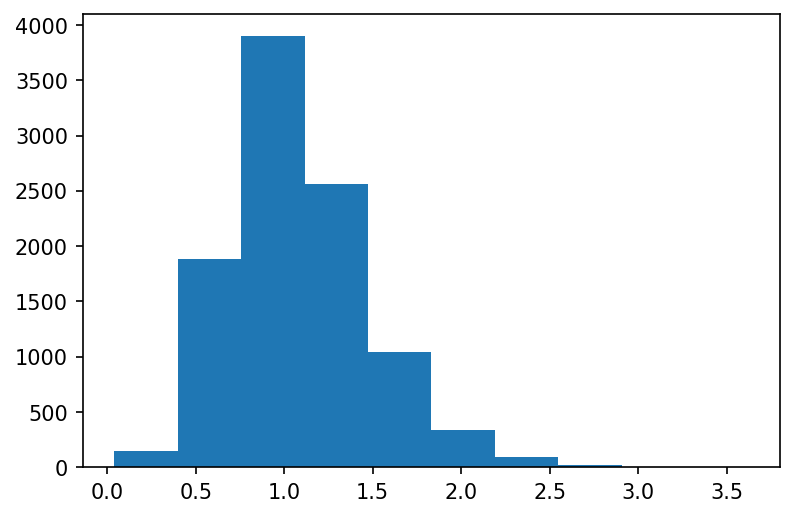

In [16]:
plt.hist(a[:][2].data.numpy())

In [28]:
len(testdataset)

10000

In [6]:
traindataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
trainloader = torch.utils.data.DataLoader(traindataset,
                                          batch_size=1,
                                          shuffle=False)

testloader = torch.utils.data.DataLoader(testdataset,
                                          batch_size=1,
                                          shuffle=False)